In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Outputs Overview

In [2]:
# Read the csv file
output = pd.read_csv('output.csv', header=None)

# Set names and constants
output.columns = ["Number of handover reservations",
                  "Percentage Calls Blocked", "Percentage Calls Dropped"]

In [3]:
output_no_reservation = output[output["Number of handover reservations"] == 0].reset_index(drop=True)
del output_no_reservation["Number of handover reservations"]
output_no_reservation

,Percentage Calls Blocked,Percentage Calls Dropped
0,0.34333,0.63000
1,0.33867,0.53400
2,0.34267,0.55733
3,0.31400,0.53533
4,0.39400,0.61467
...,...,...
115,0.35400,0.59000
116,0.35467,0.58600
117,0.31600,0.60400
118,0.34333,0.56133


In [4]:
output_handover_reservation = output[output["Number of handover reservations"] == 1] \
                                .reset_index(drop=True)
del output_handover_reservation["Number of handover reservations"]
output_handover_reservation

,Percentage Calls Blocked,Percentage Calls Dropped
0,1.08333,0.35667
1,1.08067,0.30867
2,1.09933,0.31533
3,1.13467,0.37667
4,1.11400,0.32333
...,...,...
115,1.14267,0.37533
116,1.11200,0.34600
117,1.07067,0.30667
118,1.13267,0.34333


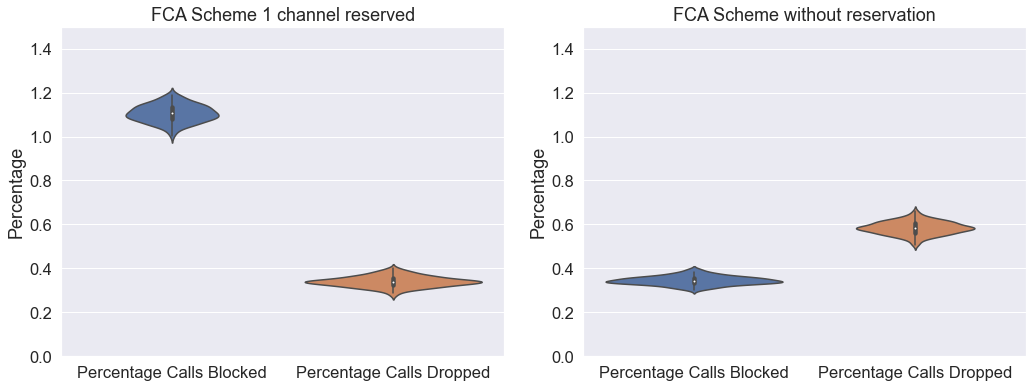

In [7]:
# Set the display
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.5)

# Set 2 subplots
fig, axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)

# Plot the simulation outputs for both 2 FCA schemes
sns.violinplot(data=output_no_reservation, ax=axs[1]) \
    .set(ylabel="Percentage", ylim=(0, 1.5), title="FCA Scheme without reservation")
sns.violinplot(data=output_handover_reservation, ax=axs[0]) \
    .set(ylabel="Percentage", ylim=(0, 1.5), title="FCA Scheme 1 channel reserved")

plt.show()

### 3. Output Analysis

In [8]:
# t value and sample size
t = 1.66
n = 120

In [9]:
print("FCA Scheme without reservation")
print()
blocked_rate_no_reservation = output_no_reservation['Percentage Calls Blocked']
dropped_rate_no_reservation = output_no_reservation['Percentage Calls Dropped']

print("----- % Calls Dropped -----")
# Calculate the mean and confidence interval
mean2 = dropped_rate_no_reservation.mean()
std2 = dropped_rate_no_reservation.std(ddof=1)
delta2 = t*std2/(math.sqrt(n))
print("Mean: {:f}".format(mean2))
print("Standard Deviation: {:f}".format(std2))
print("Half-width: {:f}".format(delta2))
print("Approx. 90% confidence interval: [{:f}, {:f}]".format(mean2 - delta2, mean2 + delta2))

print()

print("----- % Calls Blocked -----")
# Calculate the mean and confidence interval
mean1 = blocked_rate_no_reservation.mean()
std1 = blocked_rate_no_reservation.std(ddof=1)
delta1 = t*std1/(math.sqrt(n))
print("Mean: {:f}".format(mean1))
print("Standard Deviation: {:f}".format(std1))
print("Half-width: {:f}".format(delta1))
print("Approx. 90% confidence interval: [{:f}, {:f}]".format(mean1 - delta1, mean1 + delta1))

FCA Scheme without reservation

----- % Calls Dropped -----
Mean: 0.584600
Standard Deviation: 0.029010
Half-width: 0.004396
Approx. 90% confidence interval: [0.580204, 0.588996]

----- % Calls Blocked -----
Mean: 0.345345
Standard Deviation: 0.019549
Half-width: 0.002962
Approx. 90% confidence interval: [0.342382, 0.348307]


In [10]:
print("FCA Scheme with Channel Reservation")
print()
blocked_rate_handover_reservation = output_handover_reservation['Percentage Calls Blocked']
dropped_rate_handover_reservation = output_handover_reservation['Percentage Calls Dropped']

print("-----Dropped Calls Rate (%)-----")
# Calculate the mean and confidence interval
mean4 = dropped_rate_handover_reservation.mean()
std4 = dropped_rate_handover_reservation.std(ddof=1)
delta4 = t*std4/(math.sqrt(n))
print("Mean: {:f}".format(mean4))
print("Standard Deviation: {:f}".format(std4))
print("Half-Width: {:f}".format(delta4))
print("Approx. 90% confidence interval: [{:f}, {:f}]".format(mean4 - delta4, mean4 + delta4))

print()

print("-----Blocked Calls Rate (%)-----")
# Calculate the mean and confidence interval
mean3 = blocked_rate_handover_reservation.mean()
std3 = blocked_rate_handover_reservation.std(ddof=1)
delta3 = t*std3/(math.sqrt(n))
print("Mean: {:f}".format(mean3))
print("Standard Deviation: {:f}".format(std3))
print("Half-Width: {:f}".format(delta3))
print("Approx. 90% confidence interval: [{:f}, {:f}]".format(mean3 - delta3, mean3 + delta3))

FCA Scheme with Channel Reservation

-----Dropped Calls Rate (%)-----
Mean: 0.340572
Standard Deviation: 0.023829
Half-Width: 0.003611
Approx. 90% confidence interval: [0.336961, 0.344183]

-----Blocked Calls Rate (%)-----
Mean: 1.106061
Standard Deviation: 0.039243
Half-Width: 0.005947
Approx. 90% confidence interval: [1.100114, 1.112008]


### 4. Comparisions between different FCA schemes

#### Blocked Calls rate

In [11]:
# Calculate the difference in Blocked Calls rate between 2 schemes
Z_r_blocked_rate = blocked_rate_no_reservation - blocked_rate_handover_reservation
data_blocked_rate = {"Blocked rate without reservation": blocked_rate_no_reservation,
                     "Blocked Rate with reservation": blocked_rate_handover_reservation,
                     "Difference (Col 1 - Col 2)": Z_r_blocked_rate}
df_blocked_rate = pd.DataFrame(data_blocked_rate)
df_blocked_rate

,Blocked rate without reservation,Blocked Rate with reservation,Difference (Col 1 - Col 2)
0,0.34333,1.08333,-0.74000
1,0.33867,1.08067,-0.74200
2,0.34267,1.09933,-0.75666
3,0.31400,1.13467,-0.82067
4,0.39400,1.11400,-0.72000
...,...,...,...
115,0.35400,1.14267,-0.78867
116,0.35467,1.11200,-0.75733
117,0.31600,1.07067,-0.75467
118,0.34333,1.13267,-0.78934


In [22]:
# Calculate the mean and standard deviation
mean5 = Z_r_blocked_rate.mean()
std5 = Z_r_blocked_rate.std(ddof=1)
# Get the confidence interval
t = 1.66
n = 120
delta5 = t*std5/(math.sqrt(n))

print("---Difference in rate of blocked calls---")
print()
print("Mean of (theta1 - theta2): {:f}".format(mean5))
print("Standard Deviation of (theta1 - theta2): {:f}".format(std5))
print("Half-width: {:f}".format(delta5))
print("Approx. 90% confidence interval for (theta1 - theta2): [{:f}, {:f}]".format(mean5 -delta5, mean5 + delta5))

---Difference in rate of blocked calls---

Mean of (theta1 - theta2): -0.760717
Standard Deviation of (theta1 - theta2): 0.044431
Half-width: 0.006733
Approx. 90% confidence interval for (theta1 - theta2): [-0.767450, -0.753984]


The system with FCA scheme in which there is no reservation

is better because it completely has a lower Blocked Calls rate 

#### Dropped Calls rate

In [14]:
# Calculate the difference in Dropped Calls rate between 2 schemes
Z_r_dropped_rate = dropped_rate_no_reservation - dropped_rate_handover_reservation
data_dropped_rate = {"Dropped rate without reservation": dropped_rate_no_reservation,
                     "Dropped rate with reservation": dropped_rate_handover_reservation,
                     "Difference (Col 1 - Col 2)": Z_r_dropped_rate}
data_dropped_rate = pd.DataFrame(data_dropped_rate)
data_dropped_rate

,Dropped rate without reservation,Dropped rate with reservation,Difference (Col 1 - Col 2)
0,0.63000,0.35667,0.27333
1,0.53400,0.30867,0.22533
2,0.55733,0.31533,0.24200
3,0.53533,0.37667,0.15866
4,0.61467,0.32333,0.29134
...,...,...,...
115,0.59000,0.37533,0.21467
116,0.58600,0.34600,0.24000
117,0.60400,0.30667,0.29733
118,0.56133,0.34333,0.21800


In [21]:
# Calculate the mean and standard deviation
mean6 = Z_r_dropped_rate.mean()
std6 = Z_r_dropped_rate.std(ddof=1)
# Get the confidence interval
t = 1.66
n = 120
delta6 = t*std6/(math.sqrt(n))

print("--- Difference in rate of dropped calls ---")
print()
print("Mean of (theta1 - theta2): {:f}".format(mean6))
print("Standard Deviation of (theta1 - theta2): {:f}".format(std6))
print("Half-width: {:f}".format(delta6))
print("Approx. 90% confidence interval for (theta1 - theta2): [{:f}, {:f}]".format(mean6 -delta6, mean6 + delta6))

--- Difference in rate of dropped calls ---

Mean of (theta1 - theta2): 0.244028
Standard Deviation of (theta1 - theta2): 0.035984
Half-width: 0.005453
Approx. 90% confidence interval for (theta1 - theta2): [0.238575, 0.249481]


The system with FCA scheme in which there is 1 channel reserved for call handover

is better because it completely has a lower Dropped Calls rate 

#### Comparisions FCA Schemes with different handover reservations

In [38]:
# Read the csv files
reservations = pd.read_csv("output_different_reserved.csv", header=None)
reservations.columns = ['Number of channels reserved for handover', \
                        '% Blocked Calls', '% Dropped Calls']
reservations.head(10)

,Number of channels reserved for handover,% Blocked Calls,% Dropped Calls
0,1,1.09733,0.33067
1,2,2.59000,0.18800
2,3,5.57600,0.07867
3,4,10.32400,0.02467
4,5,17.80800,0.00467
5,6,27.13933,0.00067
6,7,40.27533,0.00000
7,8,55.26800,0.00000
8,9,73.52000,0.00000


## Write about whether meeting QoS requirements in report!!